<a href="https://colab.research.google.com/github/Neha-sankeerthana/InternshipStudio/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [ ]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
X=df.drop(columns=['math score'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [ ]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
Y=df["math score"]
Y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [ ]:
print("categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable:     ",end=" ")
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable:     ",end=" ")
print(df['parental level of education'].unique())
print("categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course' variable:     ",end=" ")
print(df['test preparation course'].unique())


categories in 'gender' variable:      ['female' 'male']
categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:      ['standard' 'free/reduced']
categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_trans=StandardScaler()
cat_trans=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",cat_trans,cat_cols),
        ("StandardScaler",num_trans,num_cols)
    ]
)

In [ ]:
x=preprocessor.fit_transform(X)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
x.shape

(1000, 19)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=35)


In [ ]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2=r2_score(true,predicted)
  return mae,mse,rmse,r2

In [ ]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)


    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for training set")
    print("-RMSE:{:.4f}".format(model_train_rmse))
    print("-MAE:{:.4f}".format(model_train_mae))
    print("-R2:{:.4f}".format(model_train_r2))
    print('------------------------------------')
    print("Model performance for test set")
    print("-RMSE:{:.4f}".format(model_test_rmse))
    print("-MAE:{:.4f}".format(model_test_mae))
    print("-R2:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
-RMSE:5.4366
-MAE:4.3426
-R2:0.8712
------------------------------------
Model performance for test set
-RMSE:4.8712
-MAE:3.8893
-R2:0.8948


Lasso
Model performance for training set
-RMSE:6.7095
-MAE:5.2894
-R2:0.8039
------------------------------------
Model performance for test set
-RMSE:6.0596
-MAE:4.8147
-R2:0.8373


Ridge
Model performance for training set
-RMSE:5.4369
-MAE:4.3413
-R2:0.8712
------------------------------------
Model performance for test set
-RMSE:4.8647
-MAE:3.8855
-R2:0.8951


KNN
Model performance for training set
-RMSE:5.7681
-MAE:4.5577
-R2:0.8550
------------------------------------
Model performance for test set
-RMSE:6.8766
-MAE:5.5150
-R2:0.7904


Decision Tree
Model performance for training set
-RMSE:0.2500
-MAE:0.0125
-R2:0.9997
------------------------------------
Model performance for test set
-RMSE:8.0380
-MAE:6.3100
-R2:0.7137


Random Forest
Model performance for training set
-RMSE:2.3082
-MAE:

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.895127
0,Linear Regression,0.894845
5,Random Forest,0.840408
1,Lasso,0.837284
3,KNN,0.790445
4,Decision Tree,0.713682


In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred) * 100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 89.48%


Text(0, 0.5, 'Predicted')

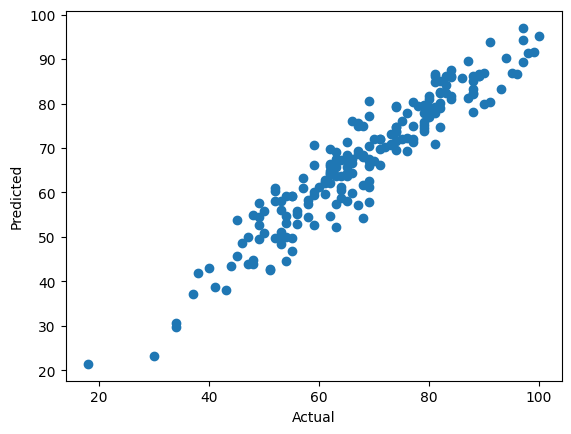

In [ ]:
plt.scatter(y_test,y_pred);

plt.xlabel('Actual');

plt.ylabel('Predicted')

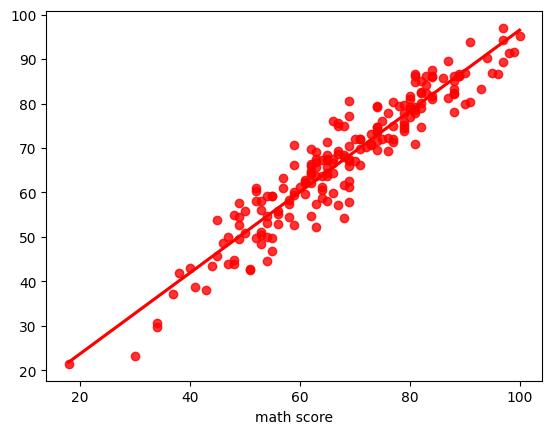

In [ ]:
sns.regplot(x=y_test,y=y_pred, ci=None, color='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
832,64,63.740044,0.259956
617,88,86.122593,1.877407
638,86,85.852911,0.147089
939,77,71.964151,5.035849
826,56,55.118232,0.881768
...,...,...,...
456,79,79.648926,-0.648926
669,81,77.896769,3.103231
677,70,67.048489,2.951511
333,90,86.968118,3.031882


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
